In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\KIIT0001\PycharmProjects\PythonProject\Job-Recruitment\Building-Job-Recruitement\Placement_Data_Full_Class.csv")

In [2]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.drop(['ssc_b','hsc_b', 'hsc_s', 'degree_t', 'salary'], axis=1, inplace=True)

In [5]:

df["gender"] = df.gender.map({"M":0,"F":1})
df["workex"] = df.workex.map({"No":0, "Yes":1})
df["status"] = df.status.map({"Not Placed":0, "Placed":1})
df["specialisation"] = df.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

# BALANCED DATASET

In [7]:
df['status'].value_counts()

status
1    148
0     67
Name: count, dtype: int64

In [9]:

from sklearn.utils import resample

# Separate the majority and minority classes
data_majority = df[df['status'] == 1]
data_minority = df[df['status'] == 0]

# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                   replace=True,     # sample with replacement
                                   n_samples=len(data_majority),    # to match majority class
                                   random_state=42) # reproducible results

# Combine majority class with upsampled minority class
balanced_data = pd.concat([data_majority, data_minority_upsampled])

In [12]:
balanced_data['status'].value_counts()

status
1    148
0    148
Name: count, dtype: int64

# TRAIN TEST SPLIT

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X=balanced_data.copy().drop('status', axis=1)
y=balanced_data['status']

In [17]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((207, 9), (207,), (89, 9), (89,))

# FEATURE SCALING

In [21]:
#difference in scaling and balancing
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# 1KN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_y_pred=knn.predict(X_test)

In [37]:
knn_y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0])

In [40]:
knn_accuracy=knn.score(X_test,y_test)
knn_accuracy

0.8089887640449438

In [41]:
knn_accuracy=accuracy_score(knn_y_pred,y_test)
knn_accuracy

0.8089887640449438

# Confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix(y_test,knn_y_pred)

array([[35,  9],
       [ 8, 37]])

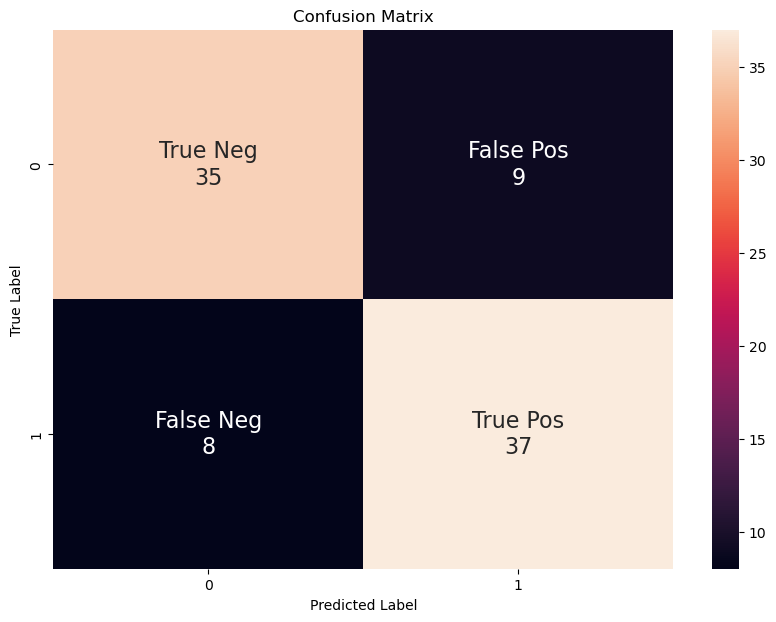

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(y_test, knn_y_pred)
fig = plt.figure(figsize=(10,7))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
